In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read CSV
unemployed_data_one = pd.read_csv("../Resources/unemployment_2010-2015.csv")
unemployed_data_two = pd.read_csv("../Resources/unemployment_2016-2020.csv")

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

,Country Name,Country Code_x,2010,2011,2012,2013,2014,2015,Country Code_y,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,AFE,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,AFG,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,AFW,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,AGO,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,ALB,15.420000,13.620000,12.300000,11.470000,11.700000


In [3]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,6.879694,6.730720,6.578243,6.480673,6.414462,6.468598,6.546351,6.523061,6.414392,6.472269,6.814177
1,Afghanistan,AFG,11.520000,11.510000,11.520000,11.540000,11.450000,11.390000,11.310000,11.180000,11.060000,10.980000,11.730000
2,Africa Western and Central,AFW,4.471161,4.466731,4.560139,4.356187,4.640632,4.547113,5.486480,5.927104,5.910615,5.928926,6.300105
3,Angola,AGO,9.430000,7.360000,7.370000,7.380000,7.310000,7.260000,7.200000,7.100000,7.000000,6.930000,7.700000
4,Albania,ALB,14.090000,13.480000,13.380000,15.870000,18.060000,17.190000,15.420000,13.620000,12.300000,11.470000,11.700000


In [4]:
# Set the 'Country Code' to be our index for easy referencing of rows
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")

In [5]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_unemployed_data.mean()

# Collect the years where data was collected
years = average_unemployment.keys()

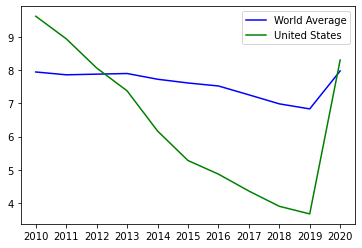

In [6]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014","2015",
                                                                  "2016","2017","2018","2019","2020"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

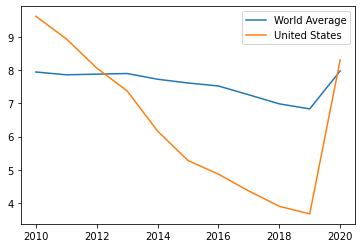

In [7]:
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2020"].plot(label="United States")
plt.legend()
plt.show()